<a href="https://colab.research.google.com/github/lehai0609/KagglePlayground/blob/main/Playground_S5E7_EDA_and_Baseline_0_973279.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Overview

In this notebook, I'm doing EDA for the dataset and perform a baseline model based on EDA analysis.
It's a very standardized process, just like the dataset provided in this month's challenge

# I. EDA

## 1. Import data

In [22]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Define the base path to the dataset folder in Google Drive
base_path = '/content/drive/MyDrive/Kaggle/Playground S5E7'

# Define the paths to the individual CSV files
train_path = f'{base_path}/train.csv'
test_path = f'{base_path}/test.csv'
sample_submission_path = f'{base_path}/sample_submission.csv'
original_df_1_path = f'{base_path}/original_df_1.csv'
original_df_2_path = f'{base_path}/original_df_2.csv'

# Read the CSV files into pandas DataFrames
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
sample_submission_df = pd.read_csv(sample_submission_path)
original_df_1 = pd.read_csv(original_df_1_path)
original_df_2 = pd.read_csv(original_df_2_path)

# Display the head of each DataFrame to verify the import
print("Train DataFrame Head:")
display(train_df.head())

print("\nTest DataFrame Head:")
display(test_df.head())

print("\nSample Submission DataFrame Head:")
display(sample_submission_df.head())

print("\nOriginal DataFrame 1 Head:")
display(original_df_1.head())

print("\nOriginal DataFrame 2 Head:")
display(original_df_2.head())

Train DataFrame Head:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert



Test DataFrame Head:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0



Sample Submission DataFrame Head:


,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert



Original DataFrame 1 Head:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert



Original DataFrame 2 Head:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [24]:
# Check the shape of the training and test datasets
print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)

# Look at basic info about data types and memory usage for the training dataset
print("\nInfo of train_df:")
display(train_df.info())

# Look at basic info about data types and memory usage for the test dataset
print("\nInfo of test_df:")
display(test_df.info())

Shape of train_df: (18524, 9)
Shape of test_df: (6175, 8)

Info of train_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


None


Info of test_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


None

**OBSERVATION:**

This's a standard 2 class classification challenge.

The target is Personality (Introvert/Extrovert). There are 7 features, 5 numerical features & 2 categorical features ['Stage_fear', 'Drained_after_socializing']

There seams to be some amount of missing values in both train & test dataset, we would need to take care of.

## 2. Missing values

In [25]:
# Calculate missing values for train_df
train_missing = train_df.isnull().sum()
train_missing_percentage = (train_missing / len(train_df)) * 100

# Calculate missing values for test_df
test_missing = test_df.isnull().sum()
test_missing_percentage = (test_missing / len(test_df)) * 100

# Create a DataFrame to summarize missing values
missing_summary = pd.DataFrame({
    'Train Missing Count': train_missing,
    'Train Missing Percentage (%)': train_missing_percentage,
    'Test Missing Count': test_missing,
    'Test Missing Percentage (%)': test_missing_percentage
})

# Display the missing values summary table
display(missing_summary)

,Train Missing Count,Train Missing Percentage (%),Test Missing Count,Test Missing Percentage (%)
Drained_after_socializing,1149,6.202764,432.0,6.995951
Friends_circle_size,1054,5.689916,350.0,5.668016
Going_outside,1466,7.914057,466.0,7.546559
Personality,0,0.000000,NaN,NaN
Post_frequency,1264,6.823580,408.0,6.607287
Social_event_attendance,1180,6.370114,397.0,6.429150
Stage_fear,1893,10.219175,598.0,9.684211
Time_spent_Alone,1190,6.424098,425.0,6.882591
id,0,0.000000,0.0,0.000000


**OBSERVATION:**

All features have a missing rate at above 5%. Stage_fear has 10.219% of missing at train_df.



In [26]:
# Calculate missing values for original_df_1
original_df_1_missing = original_df_1.isnull().sum()
original_df_1_missing_percentage = (original_df_1_missing / len(original_df_1)) * 100

# Calculate missing values for original_df_2
original_df_2_missing = original_df_2.isnull().sum()
original_df_2_missing_percentage = (original_df_2_missing / len(original_df_2)) * 100

# Create a DataFrame to summarize missing values
original_missing_summary = pd.DataFrame({
    'Original DF 1 Missing Count': original_df_1_missing,
    'Original DF 1 Missing Percentage (%)': original_df_1_missing_percentage,
    'Original DF 2 Missing Count': original_df_2_missing,
    'Original DF 2 Missing Percentage (%)': original_df_2_missing_percentage
})

# Display the missing values summary table
display(original_missing_summary)

,Original DF 1 Missing Count,Original DF 1 Missing Percentage (%),Original DF 2 Missing Count,Original DF 2 Missing Percentage (%)
Time_spent_Alone,0,0.0,63,2.172414
Stage_fear,0,0.0,73,2.517241
Social_event_attendance,0,0.0,62,2.137931
Going_outside,0,0.0,66,2.275862
Drained_after_socializing,0,0.0,52,1.793103
Friends_circle_size,0,0.0,77,2.655172
Post_frequency,0,0.0,65,2.241379
Personality,0,0.0,0,0.000000


**OBSERVATION:**

Same with original dataset, the 1st part has 0 missing values but the 2nd part has about 2% of missing values.

**SUGGESTION:**

So we need to impute missing values for both train_df, test_df & original_df_2.

For numerical features, my prefer approach is IterativeImputer (MICE - Multiple Imputation by Chained Equations). The imputer will predict missing values from other values of the observation by fitting a regression model. By this, it will preserve the relationship among variables.

For categorical features, I'll simply mode impute to missing values.

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
import numpy as np

# Identify numerical and categorical columns (excluding the target 'Personality' from imputation)
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
# Remove 'id' from numerical columns as it's an identifier and not a feature for imputation
numerical_cols.remove('id')
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
# Remove 'Personality' from categorical columns as it's the target variable
if 'Personality' in categorical_cols:
    categorical_cols.remove('Personality')
display(numerical_cols)
display(categorical_cols)

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

['Stage_fear', 'Drained_after_socializing']

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

def impute_datasets(train_df, test_df, original_df_2, numerical_cols, categorical_cols):
    # Initiate MICE for numerical features and mode imputer for categorical features
    iterative_imputer = IterativeImputer(max_iter=10, random_state=0, min_value=0)
    mode_imputer = SimpleImputer(strategy='most_frequent')

    train_df[numerical_cols] = iterative_imputer.fit_transform(train_df[numerical_cols])
    train_df[categorical_cols] = mode_imputer.fit_transform(train_df[categorical_cols])

    test_df[numerical_cols] = iterative_imputer.transform(test_df[numerical_cols])
    test_df[categorical_cols] = mode_imputer.transform(test_df[categorical_cols])

    original_df_2[numerical_cols] = iterative_imputer.transform(original_df_2[numerical_cols])
    original_df_2[categorical_cols] = mode_imputer.transform(original_df_2[categorical_cols])

    return train_df, test_df, original_df_2

train_df, test_df, original_df_2 = impute_datasets(train_df, test_df, original_df_2, numerical_cols, categorical_cols)

# Verify that there are no more missing values in the relevant columns
print("Missing values after imputation (train_df):")
display(train_df[numerical_cols + categorical_cols].isnull().sum())

print("\nMissing values after imputation (test_df):")
display(test_df[numerical_cols + categorical_cols].isnull().sum())

print("\nMissing values after imputation (original_df_2):")
display(original_df_2[numerical_cols + categorical_cols].isnull().sum())

Missing values after imputation (train_df):


,0
Time_spent_Alone,0
Social_event_attendance,0
Going_outside,0
Friends_circle_size,0
Post_frequency,0
Stage_fear,0
Drained_after_socializing,0



Missing values after imputation (test_df):


,0
Time_spent_Alone,0
Social_event_attendance,0
Going_outside,0
Friends_circle_size,0
Post_frequency,0
Stage_fear,0
Drained_after_socializing,0



Missing values after imputation (original_df_2):


,0
Time_spent_Alone,0
Social_event_attendance,0
Going_outside,0
Friends_circle_size,0
Post_frequency,0
Stage_fear,0
Drained_after_socializing,0


## 3. Target Variables analysis

In [29]:
# Count the occurrences of each class in the target variable
class_counts = train_df['Personality'].value_counts()

# Calculate the percentage split
class_percentages = train_df['Personality'].value_counts(normalize=True) * 100

print("Class Distribution Counts:")
print(class_counts)

print("\nClass Distribution Percentages:")
print(class_percentages)

Class Distribution Counts:
Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

Class Distribution Percentages:
Personality
Extrovert    73.95271
Introvert    26.04729
Name: proportion, dtype: float64


**OBSERVATION:**

There is a slight class imbalance. For this small dataset & such amount of imbalance, using balanced class weight & stratified sampling would be sufficient.

## 4. Univariate analysis

In [30]:
# Separate numerical & categorical features
numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('id')
categorical_features = train_df.select_dtypes(include='object').columns.tolist()
categorical_features.remove('Personality')

display(numerical_features)
display(categorical_features)

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

['Stage_fear', 'Drained_after_socializing']

### Analyze categorical features

In [31]:
print("Unique values for categorical features:")
for col in categorical_features:
    print(f"\nFeature: {col}")
    print(train_df[col].unique())

Unique values for categorical features:

Feature: Stage_fear
['No' 'Yes']

Feature: Drained_after_socializing
['No' 'Yes']


### Analyze numerical features


**Reasoning**:
Iterate through the numerical features, calculate the number of unique values, and identify features that might be encoded categorical data based on a threshold and display their unique values.



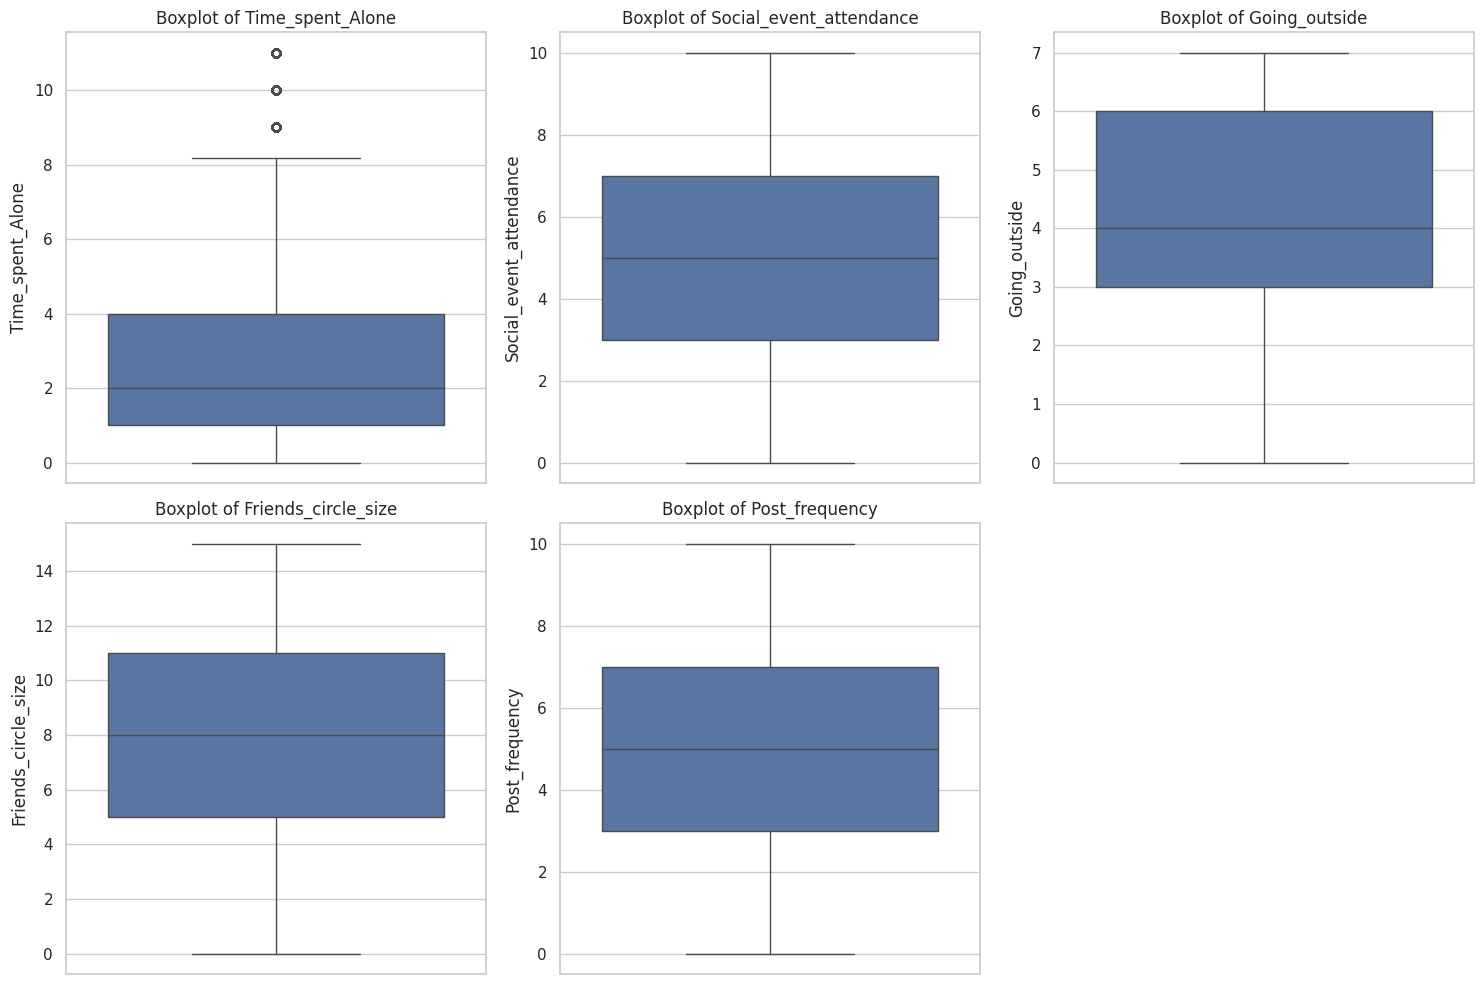

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create boxplots for all numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1) # Adjust the subplot grid as needed
    sns.boxplot(y=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

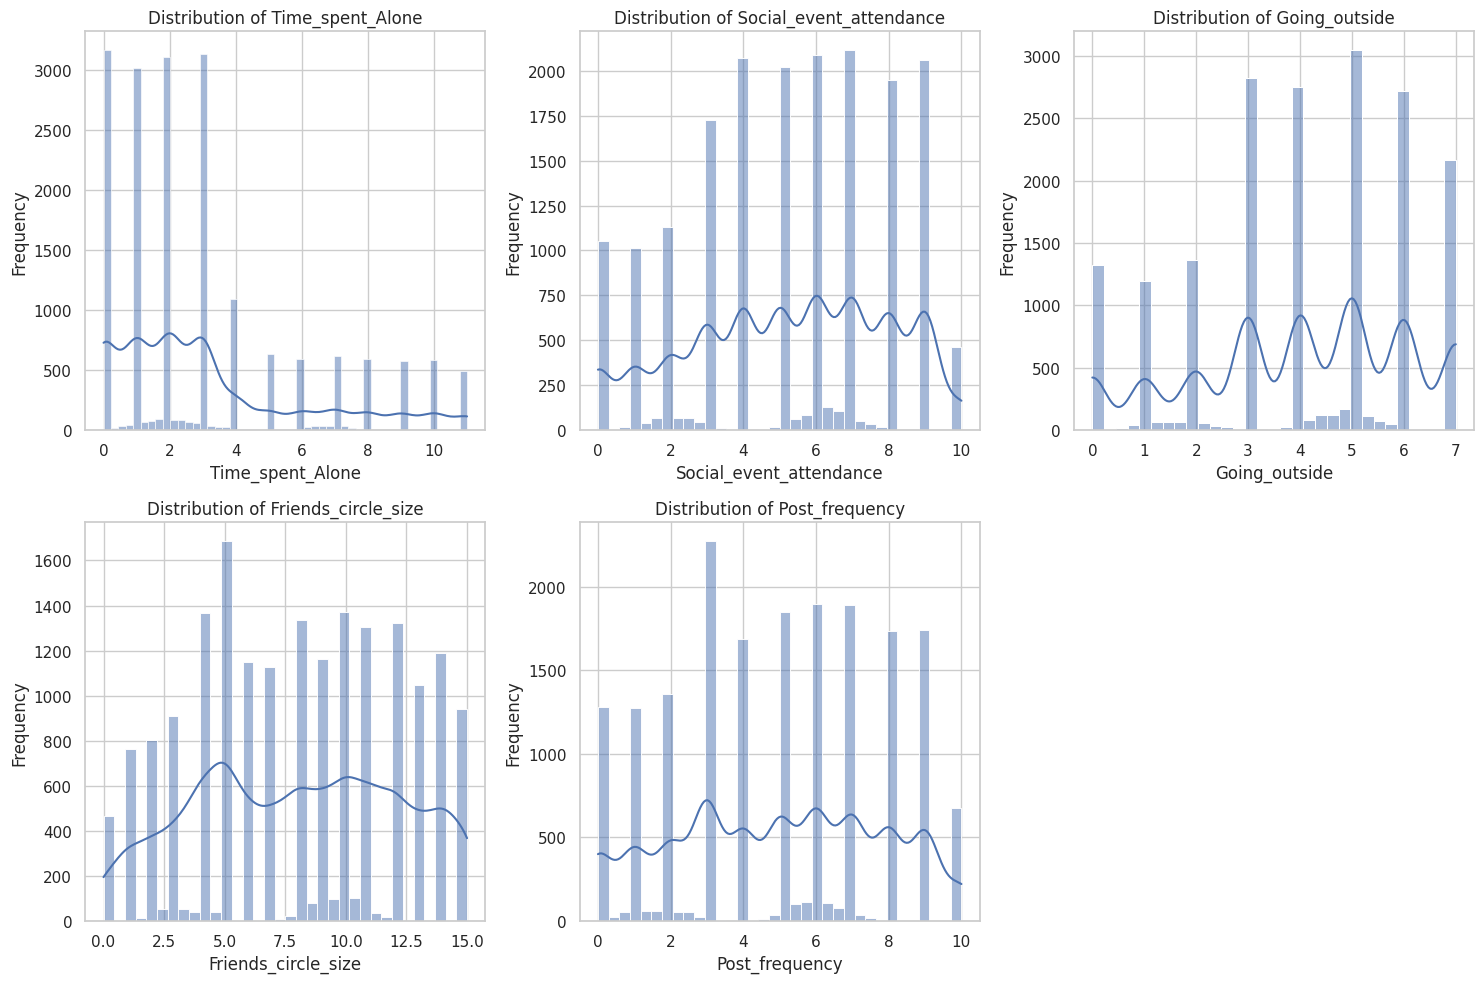

In [40]:
# Plot histograms for all numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1) # Adjust the subplot grid as needed
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**OBSERVATION:**

No obvious issue of inappropriate values or outlier of numerical values. Numerical features here are more like discreate ordinal data. I'd not want to scale or normalize them because they have an ordinal relationship.

Both categorical features are simple binary variables. They should be encoded in the modelling stage later.

## 5. Bivariate analysis

### 5.1 Feature - Target Analysis

**Details**: Analyze the relationship between numerical features and the target variable 'Personality' by comparing their distributions for introverts and extroverts.

Analyzing Numerical Features vs. Personality:


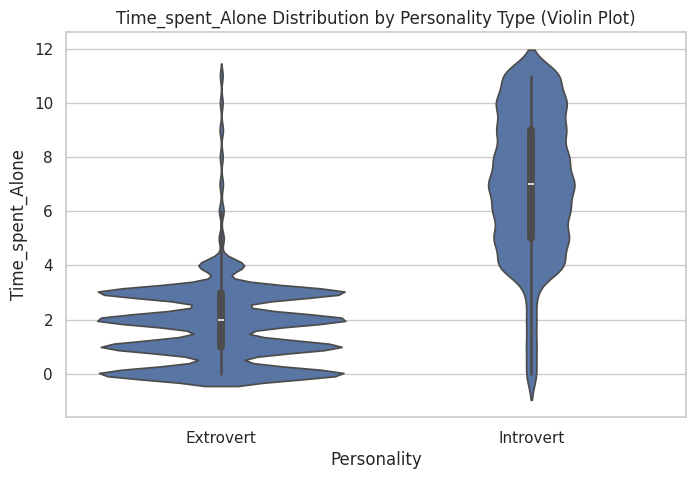

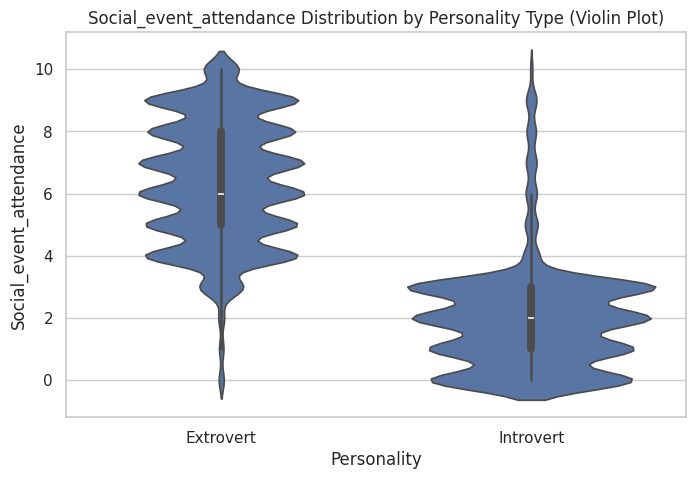

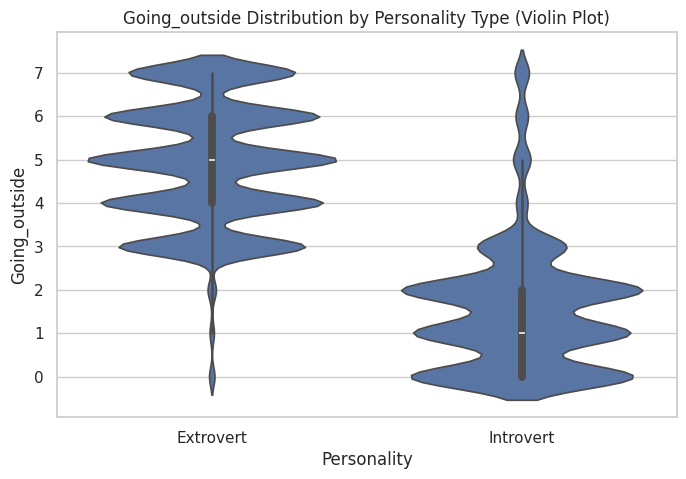

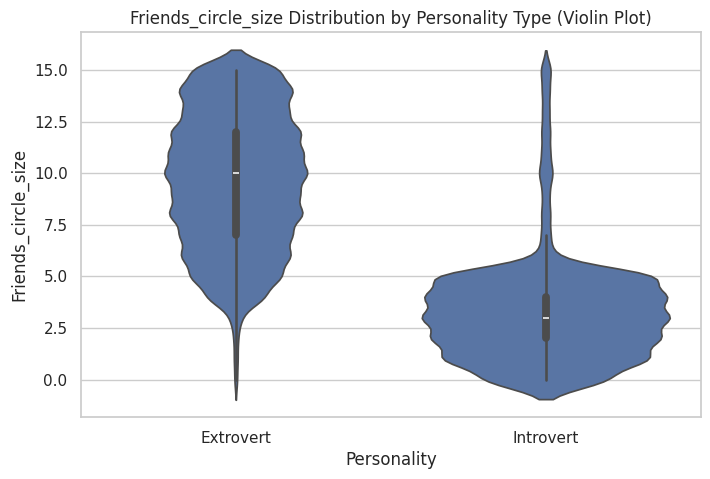

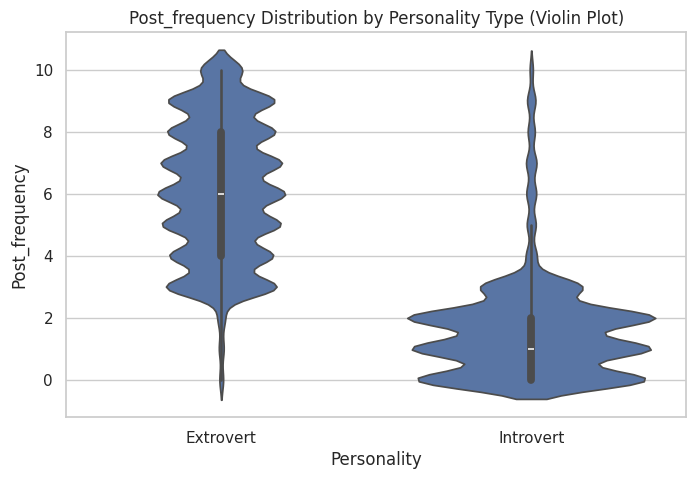

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

print("Analyzing Numerical Features vs. Personality:")

# Create plots to compare distributions of numerical features for each personality type
for feature in numerical_features:

    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Personality', y=feature, data=train_df)
    plt.title(f'{feature} Distribution by Personality Type (Violin Plot)')
    plt.xlabel('Personality')
    plt.ylabel(feature)
    plt.show()

**Detail**: Analyze the relationship between categorical features and the target variable 'Personality' by creating cross-tabulations and calculating percentages.

In [34]:
print("\nAnalyzing Categorical Features vs. Personality:")

# Create cross-tabulations and analyze the distribution of personality within each category
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    cross_tab = pd.crosstab(train_df[feature], train_df['Personality'])
    display(cross_tab)

    # Calculate percentages within each category
    cross_tab_percentage = pd.crosstab(train_df[feature], train_df['Personality'], normalize='index') * 100
    print(f"Percentage distribution of Personality within each {feature} category:")
    display(cross_tab_percentage)


Analyzing Categorical Features vs. Personality:

Feature: Stage_fear


Personality,Extrovert,Introvert
Stage_fear,,
No,13463,1039
Yes,236,3786


Percentage distribution of Personality within each Stage_fear category:


Personality,Extrovert,Introvert
Stage_fear,,
No,92.835471,7.164529
Yes,5.867727,94.132273



Feature: Drained_after_socializing


Personality,Extrovert,Introvert
Drained_after_socializing,,
No,13463,999
Yes,236,3826


Percentage distribution of Personality within each Drained_after_socializing category:


Personality,Extrovert,Introvert
Drained_after_socializing,,
No,93.092242,6.907758
Yes,5.809946,94.190054


**OBSERVATION:**

The bivariate analysis indicates that both categorical (e.g., Stage_fear, Drained_after_socializing) and numerical features are likely important for predicting personality types. It looks as expected and the synthetic data doesn't derive too far out from original dataset.

The binary categorical features are strong predictors and can be easily encoded.

Class imbalance (more Extroverts) needs to be addressed using techniques like stratified cross-validation or F1-score.

### 5.2 Feature to Feature Analysis

#### Among Numerical Features

Correlation Matrix of Numerical Features:


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.652098,-0.666978,-0.618489,-0.635900
Social_event_attendance,-0.652098,1.000000,0.618656,0.594713,0.599988
Going_outside,-0.666978,0.618656,1.000000,0.581312,0.615115
Friends_circle_size,-0.618489,0.594713,0.581312,1.000000,0.553160
Post_frequency,-0.635900,0.599988,0.615115,0.553160,1.000000


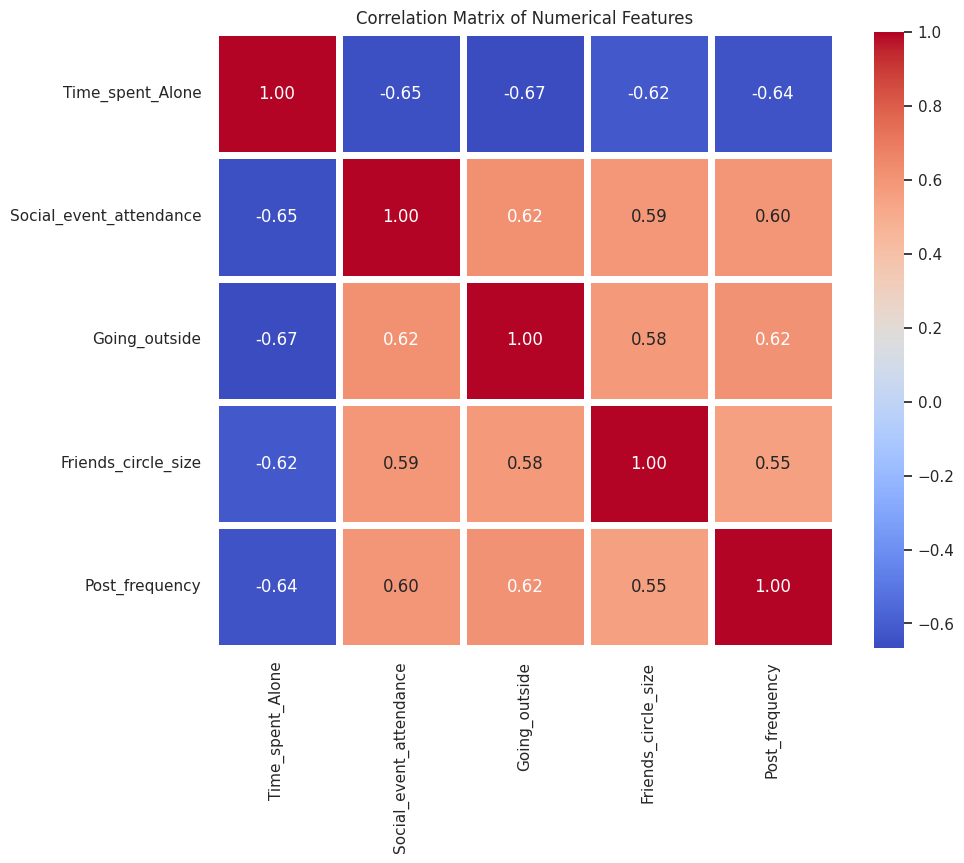

In [35]:
# Calculate the correlation matrix for numerical features
correlation_matrix = train_df[numerical_features].corr()

print("Correlation Matrix of Numerical Features:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Among Categorical Features

In [36]:
print("\nAnalyzing Relationships Among Categorical Features:")

# Create cross-tabulations for pairs of categorical features
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        feature1 = categorical_features[i]
        feature2 = categorical_features[j]
        print(f"\nRelationship between {feature1} and {feature2}:")
        cross_tab_cat = pd.crosstab(train_df[feature1], train_df[feature2])
        display(cross_tab_cat)

        # You can also calculate chi-squared test for independence if needed
        # from scipy.stats import chi2_contingency
        # chi2, p, dof, ex = chi2_contingency(cross_tab_cat)
        # print(f"Chi-squared test p-value: {p}")


Analyzing Relationships Among Categorical Features:

Relationship between Stage_fear and Drained_after_socializing:


Drained_after_socializing,No,Yes
Stage_fear,,
No,13772,730
Yes,690,3332


#### Mixed Relationships (Categorical and Numerical Features)


Analyzing Mixed Relationships (Numerical and Categorical Features):


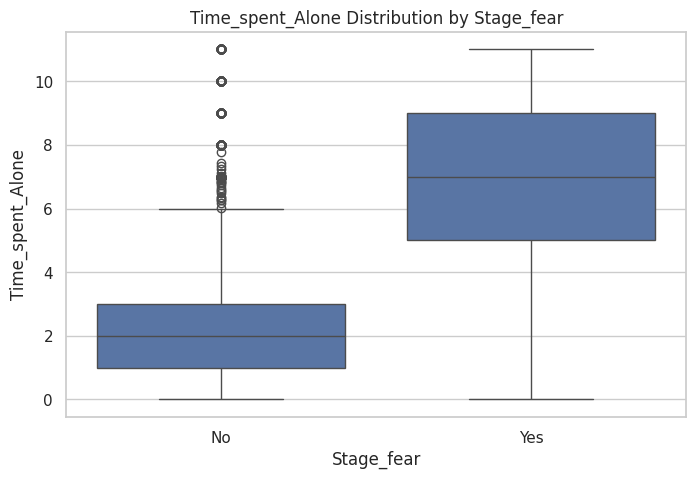

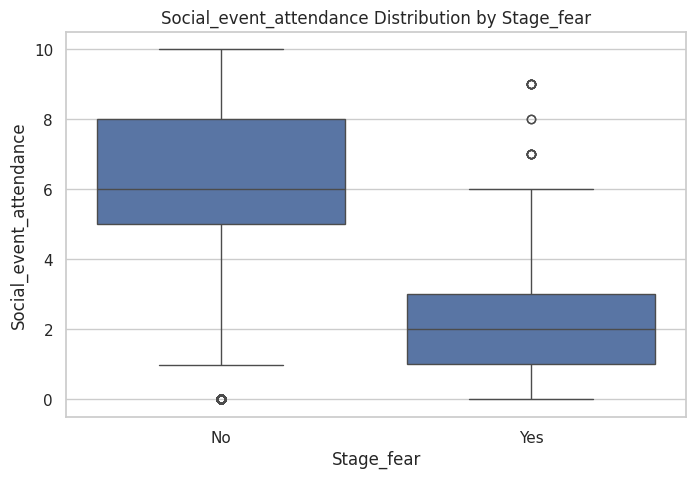

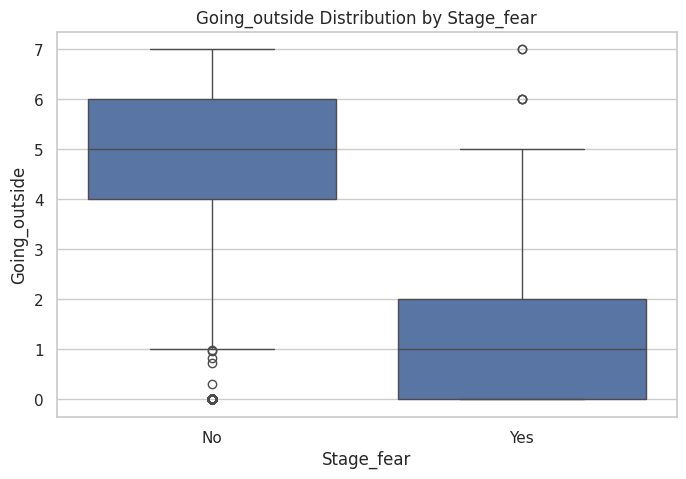

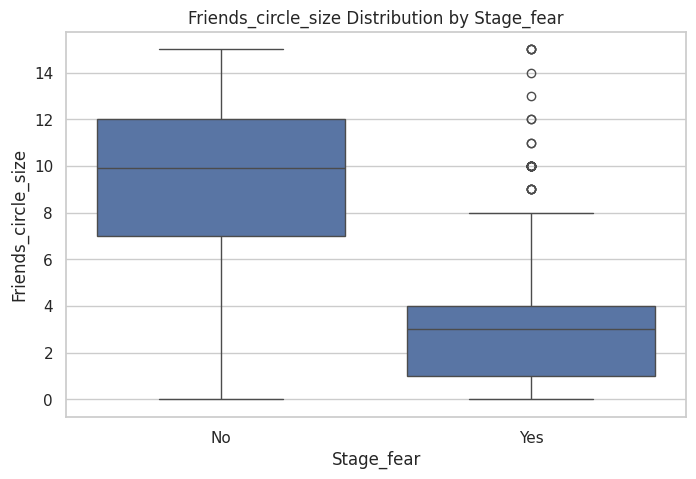

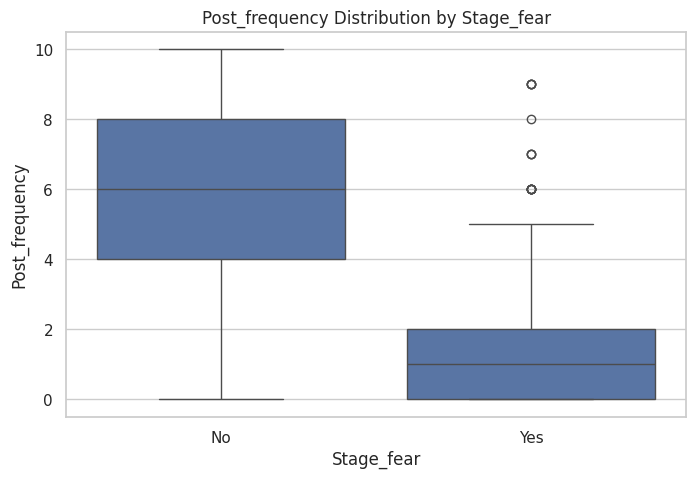

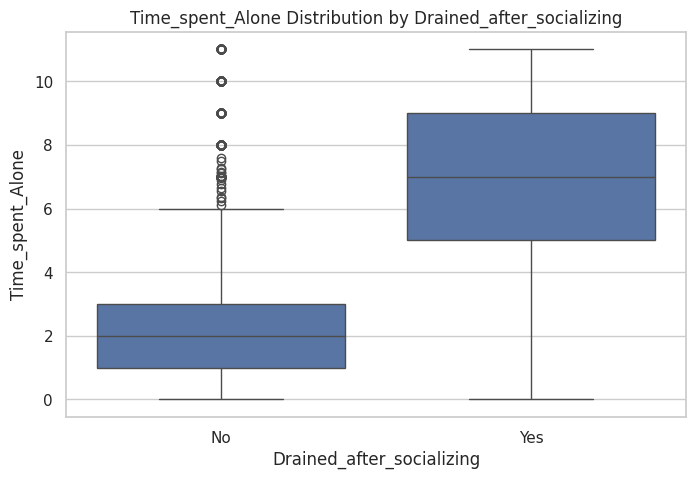

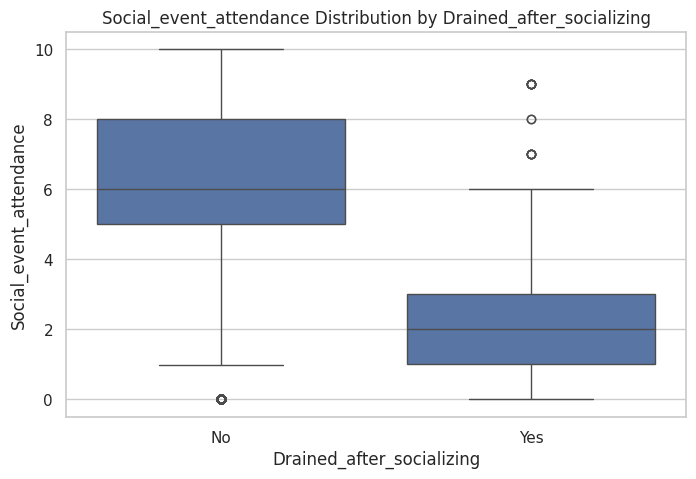

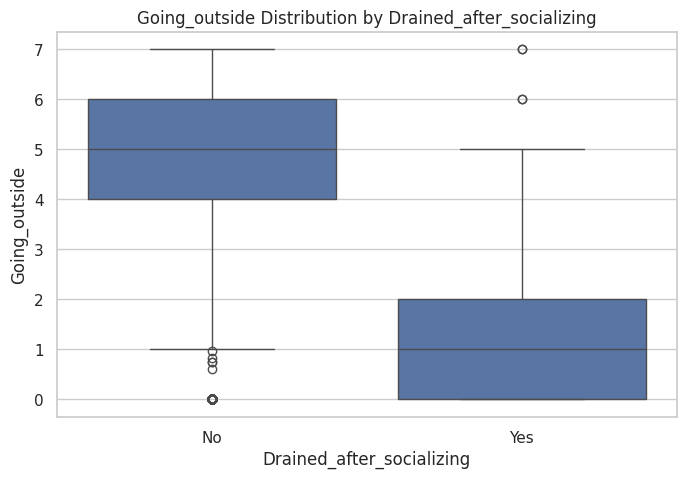

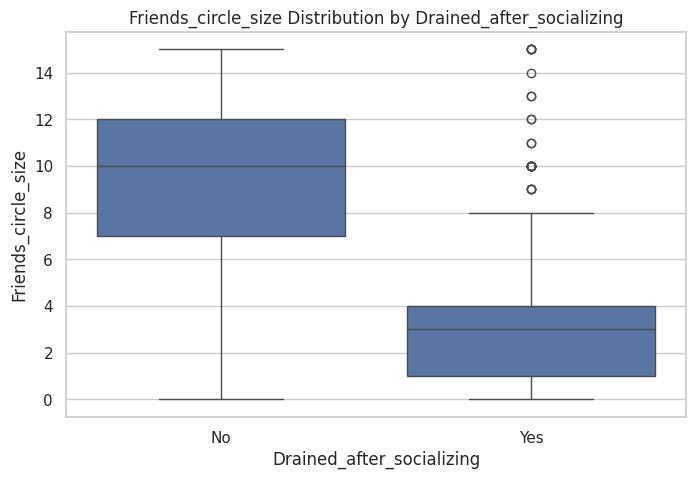

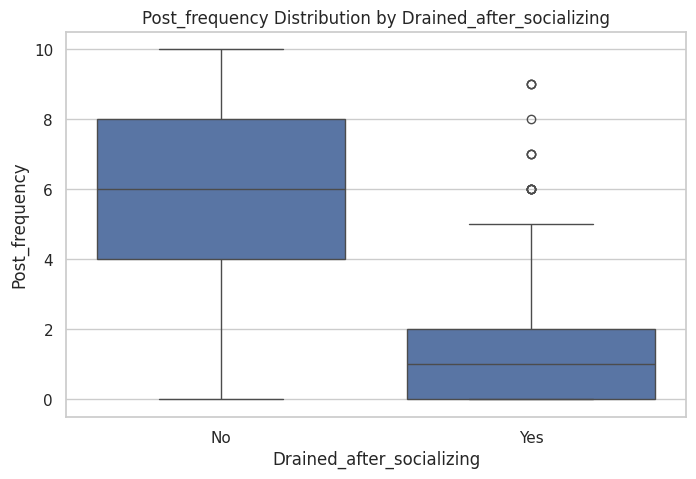

In [37]:
print("\nAnalyzing Mixed Relationships (Numerical and Categorical Features):")

# Create boxplots or violin plots to visualize numerical feature distributions within categorical groups
for cat_feature in categorical_features:
    for num_feature in numerical_features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat_feature, y=num_feature, data=train_df)
        plt.title(f'{num_feature} Distribution by {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)
        plt.show()

        # Optional: Use violin plots
        # plt.figure(figsize=(8, 5))
        # sns.violinplot(x=cat_feature, y=num_feature, data=train_df)
        # plt.title(f'{num_feature} Distribution by {cat_feature} (Violin Plot)')
        # plt.xlabel(cat_feature)
        # plt.ylabel(num_feature)
        # plt.show()

**OBSERVATION:**

This feature-to-feature analysis again confirms features are supported each others, aligned with the correlation with target variable as analysed above.

The numerical features show expected correlations based on social engagement levels. The categorical features, 'Stage_fear' and 'Drained_after_socializing', are strongly related to each other and also exhibit clear distinctions in the distributions of numerical features across their categories.

***The Correlations Are in the "Sweet Spot"***

0.55-0.67 range: Strong enough to show meaningful relationships, but not so high (>0.8) to cause multicollinearity problems

***The Structure Is Psychologically Perfect***

Features naturally align with established personality theory:

- Behavioral indicators (social events, going out, friend circle, posting)
- Preference indicators (time alone)
- Comfort/anxiety indicators (stage fear, social draining)

I suggest we go straight to modelling

# II. BASELINE MODELLING

I am building a simple XGBoost pipeline for classification while:
- Using class weight for imbalance target variables: 0.72/0.28 (extrovert/introvert)
- Stratified K-fold
- Label encoder for categorical features (Stage_fear & Drained_after_socializing)

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb

def create_xgboost_pipeline(df, target_col='personality'):
    """
    Simple XGBoost pipeline for personality classification

    Parameters:
    - df: DataFrame with features and target
    - target_col: name of target column

    Returns:
    - pipeline: fitted sklearn pipeline
    - cv_results: cross-validation results
    """

    # Define feature columns
    numerical_features = ['Time_spent_Alone', 'Social_event_attendance',
                         'Going_outside', 'Friends_circle_size', 'Post_frequency']
    categorical_features = ['Stage_fear', 'Drained_after_socializing']

    # Prepare features
    X = df[numerical_features + categorical_features].copy()
    y = df[target_col]

    # Encode binary categorical features (Yes/No -> 1/0)
    le_stage = LabelEncoder()
    le_drained = LabelEncoder()

    X['Stage_fear'] = le_stage.fit_transform(X['Stage_fear'])
    X['Drained_after_socializing'] = le_drained.fit_transform(X['Drained_after_socializing'])

    # Encode target
    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(y)

    # Calculate class weights for imbalanced data (0.28 introvert, 0.72 extrovert)
    # Assuming 0=introvert, 1=extrovert after encoding
    scale_pos_weight = 0.72 / 0.28  # ≈ 2.57

    # Create XGBoost model with class balancing
    xgb_model = xgb.XGBClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1
    )

    # Create simple pipeline (no preprocessing needed since we already encoded)
    pipeline = Pipeline([
        ('classifier', xgb_model)
    ])

    # Stratified K-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Scoring metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc'
    }

    # Perform cross-validation
    cv_results = cross_validate(
        pipeline, X, y_encoded,
        cv=cv,
        scoring=scoring,
        return_train_score=False,
        n_jobs=-1
    )

    # Fit final pipeline
    pipeline.fit(X, y_encoded)

    return pipeline, cv_results

def print_cv_results(cv_results):
    """Print cross-validation results"""
    print("Cross-Validation Results:")
    print("-" * 40)

    for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
        scores = cv_results[f'test_{metric}']
        print(f"{metric.upper():>10}: {scores.mean():.4f} ± {scores.std():.4f}")

# Run pipeline
pipeline, cv_results = create_xgboost_pipeline(train_df, target_col='Personality')

# Print results
print_cv_results(cv_results)


Cross-Validation Results:
----------------------------------------
  ACCURACY: 0.9684 ± 0.0021
 PRECISION: 0.9411 ± 0.0038
    RECALL: 0.9372 ± 0.0084
        F1: 0.9391 ± 0.0043
   ROC_AUC: 0.9659 ± 0.0029


In [39]:
# Prepare the test data

X_test = test_df[numerical_features + categorical_features].copy()
# We need the fitted LabelEncoders from the training step
# Since they were not returned by the create_xgboost_pipeline function,
# we will quickly refit them on the training data to ensure consistency
le_stage = LabelEncoder()
le_drained = LabelEncoder()

# Fit on the training data's categorical columns
le_stage.fit(train_df['Stage_fear'])
le_drained.fit(train_df['Drained_after_socializing'])

# Transform the test data's categorical columns
X_test['Stage_fear'] = le_stage.transform(X_test['Stage_fear'])
X_test['Drained_after_socializing'] = le_drained.transform(X_test['Drained_after_socializing'])

# Make predictions on the test data using the trained pipeline
test_predictions_encoded = pipeline.predict(X_test)

# Decode the predictions back to original labels ('Introvert', 'Extrovert')
# We need the fitted LabelEncoder for the target variable from the training step
# Similar to the feature encoders, we will refit the target encoder
le_target = LabelEncoder()
le_target.fit(train_df['Personality'])

test_predictions = le_target.inverse_transform(test_predictions_encoded)

# Create the submission DataFrame
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'Personality': test_predictions
})

# Display the head of the submission DataFrame
print("\nSubmission DataFrame Head:")
display(submission_df.head())

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("\nSubmission file 'submission.csv' created successfully.")


Submission DataFrame Head:


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert



Submission file 'submission.csv' created successfully.
